In [39]:
import pandas as pd 
import numpy as np 
#시각화
import matplotlib.pyplot as plt
import seaborn as sns
#경고무시
import sys
import warnings

import warnings
warnings.filterwarnings('ignore')

plt.rcParams['font.family'] = 'AppleGothic' # 맥(Mac) 사용자
# plt.rcParams['font.family'] = 'Malgun Gothic'  # (Windows 용) 한글 출력을 위한 글꼴 설정
# plt.rcParams['axes.unicode_minus'] = False    # 문자 - (마이너스) 정상 출력을 위한 코드

In [40]:
df_ori = pd.read_csv('./팀_basline_csv.csv', encoding='utf-8')

In [41]:
df=df_ori.copy()
df.drop('Unnamed: 0', axis=1, inplace=True)
df

,brandnm,goodsnm,USER,reg_date,order_date,p_type,sub_type,app_yn,days,day_type,month,How_long
0,Gucci,flower dionysus shoulder bag beige,a161237,2019-12-06,2021-01-15,7days,BA,Y,금요일,주중,1,406
1,El estilo de Claire,beads cropped jacket black,a1140859,2021-01-02,2021-01-15,4days,O,N,금요일,주중,1,13
2,Danha,embroidery point oriental mini skirt blue,a1140859,2021-01-02,2021-01-15,4days,B,N,금요일,주중,1,13
3,Danha,graphics pattern top pink,a1140859,2021-01-02,2021-01-15,4days,T,N,금요일,주중,1,13
4,Burberry London,buckle basic pattern zipup-jumper navy,a1140740,2021-01-01,2021-01-15,7days,O,Y,금요일,주중,1,14
...,...,...,...,...,...,...,...,...,...,...,...,...
1461,Yves Saint Laurent,logo point clutch bag pink,a119721,2019-04-10,2021-03-01,7days,BA,Y,공휴일,휴일,3,691
1462,Prada,saffiano lux M gray,a1146069,2021-02-11,2021-03-01,7days,BA,Y,공휴일,휴일,3,18
1463,Burberry,basic pattern sweater beige,a1147848,2021-02-28,2021-03-01,7days,T,Y,공휴일,휴일,3,1
1464,Chanel,graphics pattern sweat-shirts white,a1147788,2021-02-28,2021-03-01,7days,T,Y,공휴일,휴일,3,1


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1466 entries, 0 to 1465
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   brandnm     1466 non-null   object
 1   goodsnm     1466 non-null   object
 2   USER        1466 non-null   object
 3   reg_date    1466 non-null   object
 4   order_date  1466 non-null   object
 5   p_type      1466 non-null   object
 6   sub_type    1466 non-null   object
 7   app_yn      1466 non-null   object
 8   days        1466 non-null   object
 9   day_type    1466 non-null   object
 10  month       1466 non-null   int64 
 11  How_long    1466 non-null   int64 
dtypes: int64(2), object(10)
memory usage: 137.6+ KB


>**(1).brandnm: 아이템의 브랜드 이름 컬럼 : 범주형 <br>
(2).goodsnm : 아이템의 특성을 담은 이름 컬럼 : 범주형 <br>
(3). USER : 사용자 ID 컬럼 : 범주형 <br>
(4). reg_date : 사용자 가입일 컬럼 : 날짜형 <br>
(5). order_date : 아이템 주문일 컬럼 : 날짜형<br>
(6). p_type : 주문 상품권 종류 5일 7일 : 범주형<br>
(7). sub_type : 주문 아이템 카테고리 : 범주형 <br>
(8). add_yn : 사용자의 어플리케이션 사용 여부 : 범주형**

# Retention, Revenue


## 사용자의 재방문률을 높이고 구매를 촉진하는 방법은 무엇이 있을까? 


In [43]:
usr = list(df.USER.unique())
# usr  # 고객명단
print('고객 수 : ', len(usr))

고객 수 :  1229


### 1. (한번에 주문한 개수에 따른) 일반/우량 고객 분류

In [44]:
temp = df.USER.value_counts()
for i in range(1, 12):
    if len(temp[temp.values > i]) != 0:
        print('한번에 {}개 이상 구매(렌트)한 고객 수 : '.format(i+1), len(temp[temp.values > i]))
    else:
        break

한번에 2개 이상 구매(렌트)한 고객 수 :  139
한번에 3개 이상 구매(렌트)한 고객 수 :  50
한번에 4개 이상 구매(렌트)한 고객 수 :  17
한번에 5개 이상 구매(렌트)한 고객 수 :  9
한번에 6개 이상 구매(렌트)한 고객 수 :  8
한번에 7개 이상 구매(렌트)한 고객 수 :  5
한번에 8개 이상 구매(렌트)한 고객 수 :  3
한번에 9개 이상 구매(렌트)한 고객 수 :  3
한번에 10개 이상 구매(렌트)한 고객 수 :  2
한번에 11개 이상 구매(렌트)한 고객 수 :  1


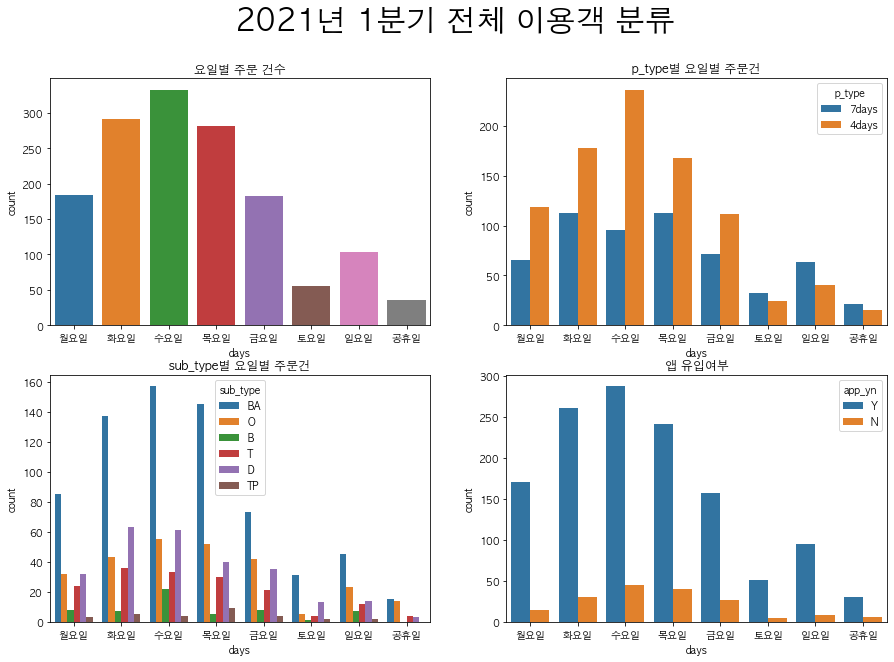

In [45]:
f, ax  = plt.subplots(2,2,figsize=(15,10))
plt.subplot(221)
sns.countplot(data=df, x='days',
             order=['월요일','화요일','수요일','목요일','금요일','토요일','일요일', '공휴일'])
plt.title('요일별 주문 건수')

plt.subplot(222)
sns.countplot(data=df, x='days', hue='p_type',
             order=['월요일','화요일','수요일','목요일','금요일','토요일','일요일', '공휴일'])
plt.title('p_type별 요일별 주문건')

plt.subplot(223)
sns.countplot(data=df, x='days', hue='sub_type',
             order=['월요일','화요일','수요일','목요일','금요일','토요일','일요일', '공휴일'])
plt.title('sub_type별 요일별 주문건')

plt.subplot(224)
sns.countplot(data=df, x='days', hue='app_yn',
             order=['월요일','화요일','수요일','목요일','금요일','토요일','일요일', '공휴일'])
plt.title('앱 유입여부')

plt.suptitle('2021년 1분기 전체 이용객 분류',fontsize=30, fontweight = 'bold')
plt.show()

한번에 10가지 이상의 아이템을 렌트한 고객의 데이터만 따로 살펴보자

In [46]:
# 10회 이상 구매한 고객 1 
df.query('USER=="a1149461"')

,brandnm,goodsnm,USER,reg_date,order_date,p_type,sub_type,app_yn,days,day_type,month,How_long
1144,Alice & Olivia,see-through lace detail blouse black,a1149461,2021-03-15,2021-03-17,4days,T,N,수요일,주중,3,2
1145,Sandro,embroidery detail lace skirt multi,a1149461,2021-03-15,2021-03-17,4days,B,N,수요일,주중,3,2
1146,Time,draping detail midi skirt gray,a1149461,2021-03-15,2021-03-17,4days,B,N,수요일,주중,3,2
1147,El estilo de Claire,ruffle detail see-through sleeve blouse black,a1149461,2021-03-15,2021-03-17,4days,T,N,수요일,주중,3,2
1148,It michaa,pocket basic pattern skirt green,a1149461,2021-03-15,2021-03-17,4days,B,N,수요일,주중,3,2
1149,roajeu,ruffle basic pattern mermaid trumpet-skirt green,a1149461,2021-03-15,2021-03-17,4days,B,N,수요일,주중,3,2
1150,Alexander Wang,basic pattern skirt grey,a1149461,2021-03-15,2021-03-17,4days,B,N,수요일,주중,3,2
1151,Christian Dior,basic pattern sweater burgundy,a1149461,2021-03-15,2021-03-17,4days,T,N,수요일,주중,3,2
1152,MSGM,basic pattern top black,a1149461,2021-03-15,2021-03-17,4days,T,N,수요일,주중,3,2
1153,Fayewoo,ruffle lace pattern mermaid trumpet-skirt red,a1149461,2021-03-15,2021-03-17,4days,B,N,수요일,주중,3,2


In [47]:
# 10회 이상 구매한 고객 2 
df.query('USER=="a1149583"')
# 마찬가지로 하루에 여러 상품 렌트
# 앱 사용 x

,brandnm,goodsnm,USER,reg_date,order_date,p_type,sub_type,app_yn,days,day_type,month,How_long
1098,Theory,one button jacket gray,a1149583,2021-03-16,2021-03-19,4days,O,N,금요일,주중,3,3
1099,Michaa,stitch detail midi skirt white,a1149583,2021-03-16,2021-03-19,4days,B,N,금요일,주중,3,3
1100,Prada,daino shoulder bag skin,a1149583,2021-03-16,2021-03-19,4days,BA,N,금요일,주중,3,3
1101,Ted Baker,pleats basic pattern blouse pink,a1149583,2021-03-16,2021-03-19,4days,T,N,금요일,주중,3,3
1102,La maille sezane,frill dots pattern blouse nude,a1149583,2021-03-16,2021-03-19,4days,T,N,금요일,주중,3,3
1103,Michaa,basic pattern A-Line knit-dress nude,a1149583,2021-03-16,2021-03-19,4days,D,N,금요일,주중,3,3
1104,Jigott,button basic pattern blouse white,a1149583,2021-03-16,2021-03-19,4days,T,N,금요일,주중,3,3
1105,It michaa,basic pattern H-Line dress white,a1149583,2021-03-16,2021-03-19,4days,D,N,금요일,주중,3,3
1106,Mine,basic pattern skirt pink,a1149583,2021-03-16,2021-03-19,4days,B,N,금요일,주중,3,3
1107,Mine,punching basic pattern skirt skyblue,a1149583,2021-03-16,2021-03-19,4days,B,N,금요일,주중,3,3


한번에 10개 이상을 구매한 고객 데이터를 살펴보면, 
- 브랜드가 대부분 다르고, 
- sub_type 중복되는 것이 많으며,
- 렌트기간이 짧다. 

이러한 성향을 보았을 때 평범한 개인(1인) 사용을 위해 렌트한 것으로 보기 어렵다. 
하루에 여러번 옷을 갈아입을 필요가 있는, 특정한 목적이 있거나, 여러명이 하나의 유저로 함께 렌트한 것으로 예상된다. 

일반적으로 1~2개의 아이템을 한번에 결제한다고 생각하고, 한번에 3개 이상을 결제/주문하는 고객을 따로 분류하여 분석을 진행한다. 
여기서 우리는 한번에 3가지 이상 아이템을 구매하는 고객을 우량고객으로 정의하기로 한다.

한번에 3개 이상 구매(렌트)한 고객은 50명이다.

In [48]:
temp = df.USER.value_counts()

# 동일한 USER의 행이 3개 이상인 경우 
over3 = list(temp[temp.values > 2].index)

# 3개 이상 이용한 고객들만 뽑은 데이터 프레임
over3_df = df[df.USER==over3[0]]
for i in range(1,len(over3)):
    over3_df = pd.concat([over3_df, df[df.USER==over3[i]]])
over3_df

,brandnm,goodsnm,USER,reg_date,order_date,p_type,sub_type,app_yn,days,day_type,month,How_long
1144,Alice & Olivia,see-through lace detail blouse black,a1149461,2021-03-15,2021-03-17,4days,T,N,수요일,주중,3,2
1145,Sandro,embroidery detail lace skirt multi,a1149461,2021-03-15,2021-03-17,4days,B,N,수요일,주중,3,2
1146,Time,draping detail midi skirt gray,a1149461,2021-03-15,2021-03-17,4days,B,N,수요일,주중,3,2
1147,El estilo de Claire,ruffle detail see-through sleeve blouse black,a1149461,2021-03-15,2021-03-17,4days,T,N,수요일,주중,3,2
1148,It michaa,pocket basic pattern skirt green,a1149461,2021-03-15,2021-03-17,4days,B,N,수요일,주중,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...
643,Convexo Concave,pleats flower pattern doublebreasted-jacket black,a1145686,2021-02-06,2021-02-14,4days,O,Y,일요일,휴일,2,8
644,Boss,button stripe pattern dress-shirts navy,a1145686,2021-02-06,2021-02-14,4days,T,Y,일요일,휴일,2,8
983,ACNE STUDIOS,stripe pattern coat white,a1132521,2020-11-23,2021-03-24,4days,O,Y,수요일,주중,3,121
984,Dior,pocket basic pattern tank top tank-top navy,a1132521,2020-11-23,2021-03-24,4days,T,Y,수요일,주중,3,121


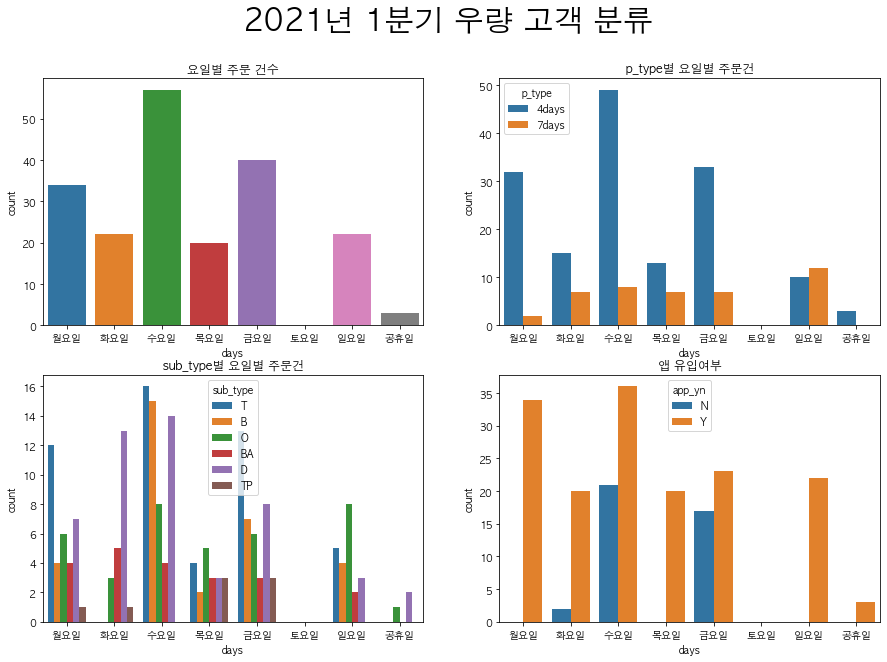

In [49]:
f, ax  = plt.subplots(2,2,figsize=(15,10))
plt.subplot(221)
sns.countplot(data=over3_df, x='days',
             order=['월요일','화요일','수요일','목요일','금요일','토요일','일요일', '공휴일'])
plt.title('요일별 주문 건수')

plt.subplot(222)
sns.countplot(data=over3_df, x='days', hue='p_type',
             order=['월요일','화요일','수요일','목요일','금요일','토요일','일요일', '공휴일'])
plt.title('p_type별 요일별 주문건')

plt.subplot(223)
sns.countplot(data=over3_df, x='days', hue='sub_type',
             order=['월요일','화요일','수요일','목요일','금요일','토요일','일요일', '공휴일'])
plt.title('sub_type별 요일별 주문건')

plt.subplot(224)
sns.countplot(data=over3_df, x='days', hue='app_yn',
             order=['월요일','화요일','수요일','목요일','금요일','토요일','일요일', '공휴일'])
plt.title('앱 유입여부')

plt.suptitle('2021년 1분기 우량 고객 분류',fontsize=30, fontweight = 'bold')
plt.show()

In [50]:
# 3개 이상 이용한 고객의 선호 브랜드
more3_df.brandnm.value_counts(ascending=False).head(10)

ACNE STUDIOS           1
Dior                   1
Sandro                 1
roajeu                 1
Christian Dior         1
Alexander Wang         1
Alice & Olivia         1
Time                   1
Fayewoo                1
El estilo de Claire    1
Name: brandnm, dtype: int64

**'Mixed'는 상.하의가 서로 다른 브랜드의 조합으로 당초 데이터에서는 결측값으로 처리되었으나, 임의로 부여한 값이다.

In [51]:
df[df.brandnm == 'Mixed']

,brandnm,goodsnm,USER,reg_date,order_date,p_type,sub_type,app_yn,days,day_type,month,How_long
146,Mixed,feminine military blouse & high waist wide slacks,a1144948,2021-01-30,2021-01-30,4days,TP,Y,토요일,휴일,1,0
147,Mixed,button basic pattern doublebreasted-jacket sky...,a170041,2020-01-01,2021-01-30,4days,TP,Y,토요일,휴일,1,395
160,Mixed,lace point shirring blouse pink & lace detail ...,a1141009,2021-01-04,2021-01-28,4days,TP,Y,목요일,주중,1,24
220,Mixed,printing pattern hoodie grey & pocket basic pa...,a1144470,2021-01-25,2021-01-26,4days,TP,Y,화요일,주중,1,1
266,Mixed,button basic pattern jacket black & pocket bas...,a121913,2019-05-05,2021-01-21,4days,TP,Y,목요일,주중,1,627
281,Mixed,buckle shirt & embroidery lace skirt charcoal,a1132297,2020-11-22,2021-01-21,7days,TP,Y,목요일,주중,1,60
284,Mixed,button tweed pattern doublebreasted-coat multi...,a1127979,2020-10-31,2021-01-21,7days,TP,Y,목요일,주중,1,82
328,Mixed,long sleeve rib t-shirt & check pattern square...,a1134915,2020-12-03,2021-01-19,7days,TP,N,화요일,주중,1,47
341,Mixed,cutout neck knit & color pleats belt skirt,a1141257,2021-01-05,2021-01-19,4days,TP,Y,화요일,주중,1,14
366,Mixed,El estilo de Claire - neoprene botanical print...,a1107090,2020-07-03,2021-01-17,4days,TP,Y,일요일,휴일,1,198


그렇다면, 1~2개를 구입하는 일반적인 패턴을 보이는 한번에 3개 이상의 아이템을 구매하는 우량 고객간의 선호 브랜드는 어떻게 다를까? 

In [52]:
temp = df.USER.value_counts()

# 한번에 1~2개만 빌린 고객들
under3 = list(temp[temp.values <= 2].index)

# 일반 고객들만 뽑은 데이터 프레임
under3_df = df[df.USER==under3[0]]
for i in range(1,len(under3)):
    under3_df = pd.concat([under3_df, df[df.USER==under3[i]]])
under3_df.head()

,brandnm,goodsnm,USER,reg_date,order_date,p_type,sub_type,app_yn,days,day_type,month,How_long
675,Louis Vuitton,favorite MM shoulder bag,a1145908,2021-02-09,2021-02-09,7days,BA,Y,화요일,주중,2,0
676,Olive des Olive,modern mood coat black,a1145908,2021-02-09,2021-02-09,4days,O,Y,화요일,주중,2,0
1115,Low classic,slim line trench coat beige,a146978,2019-10-13,2021-03-19,4days,O,Y,금요일,주중,3,523
1116,Furla,metropolis cross bag cream,a146978,2019-10-13,2021-03-19,4days,BA,Y,금요일,주중,3,523
149,Diane von Furstenberg,ribbon point wrap dress navy,a1111352,2020-08-13,2021-01-30,4days,D,Y,토요일,휴일,1,170


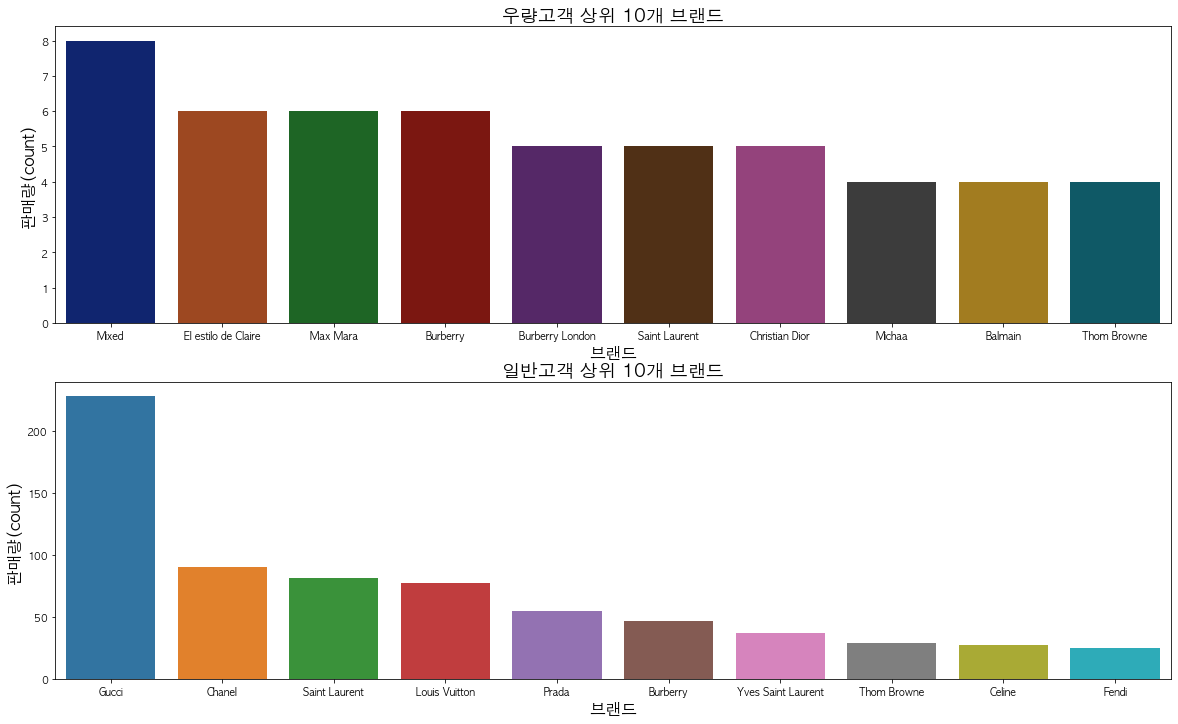

In [53]:
over3_df_br = over3_df.brandnm.value_counts().sort_values(ascending=False).head(10) # 우량고객
under3_df_br = under3_df.brandnm.value_counts().sort_values(ascending=False).head(10) # 일반고객

plt.subplots(2,1,figsize=(20,12))
plt.subplot(211)
sns.barplot(over3_df_br.index, over3_df_br.values, palette='dark')
plt.title('우량고객 상위 10개 브랜드', fontsize=18)
plt.ylabel('판매량(count)', fontsize=16)
plt.xlabel('브랜드', fontsize=16)

plt.subplot(212)
sns.barplot(under3_df_br.index, under3_df_br.values)
plt.title('일반고객 상위 10개 브랜드', fontsize=18)
plt.ylabel('판매량(count)', fontsize=16)
plt.xlabel('브랜드', fontsize=16)
plt.show()

### 2. (특정일자 기준) 기존 vs 신규 유저 분류

- reg_date 기준 올해부터 가입한 사람을 신규 유저로 정의

In [54]:
new_usr = df[df.reg_date > '2020-12-31']
new_usr

,brandnm,goodsnm,USER,reg_date,order_date,p_type,sub_type,app_yn,days,day_type,month,How_long
1,El estilo de Claire,beads cropped jacket black,a1140859,2021-01-02,2021-01-15,4days,O,N,금요일,주중,1,13
2,Danha,embroidery point oriental mini skirt blue,a1140859,2021-01-02,2021-01-15,4days,B,N,금요일,주중,1,13
3,Danha,graphics pattern top pink,a1140859,2021-01-02,2021-01-15,4days,T,N,금요일,주중,1,13
4,Burberry London,buckle basic pattern zipup-jumper navy,a1140740,2021-01-01,2021-01-15,7days,O,Y,금요일,주중,1,14
8,Gucci,dionysus cross bag,a1143028,2021-01-14,2021-01-15,4days,BA,Y,금요일,주중,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1459,Burberry London,embroidery basic pattern wool sweater brown,a1147932,2021-03-01,2021-03-01,4days,T,Y,공휴일,휴일,3,0
1460,London Fog,button basic pattern coat grey,a1147932,2021-03-01,2021-03-01,4days,O,Y,공휴일,휴일,3,0
1462,Prada,saffiano lux M gray,a1146069,2021-02-11,2021-03-01,7days,BA,Y,공휴일,휴일,3,18
1463,Burberry,basic pattern sweater beige,a1147848,2021-02-28,2021-03-01,7days,T,Y,공휴일,휴일,3,1


In [55]:
# 2021년 가입자 선호 브랜드
new_usr.brandnm.value_counts().sort_values(ascending=False).head(10)

Gucci                 166
Saint Laurent          66
Chanel                 65
Louis Vuitton          61
Prada                  36
Burberry               33
Yves Saint Laurent     24
Celine                 22
Fendi                  19
Thom Browne            19
Name: brandnm, dtype: int64

In [56]:
old_usr = df[df.reg_date <= '2020-12-31']
old_usr

,brandnm,goodsnm,USER,reg_date,order_date,p_type,sub_type,app_yn,days,day_type,month,How_long
0,Gucci,flower dionysus shoulder bag beige,a161237,2019-12-06,2021-01-15,7days,BA,Y,금요일,주중,1,406
5,Prada,ruffle detail long coat,a110231,2018-10-18,2021-01-15,7days,O,Y,금요일,주중,1,820
6,Max Mara,strap basic pattern wrap-coat black,a1139960,2020-12-26,2021-01-15,7days,O,Y,금요일,주중,1,20
7,Molliolli,pocket basic pattern fur-outer ivory,a115159,2019-01-29,2021-01-15,4days,O,Y,금요일,주중,1,717
9,Sandro,pattern pointed cardigan black,a117306,2019-03-02,2021-01-15,7days,O,Y,금요일,주중,1,685
...,...,...,...,...,...,...,...,...,...,...,...,...
1449,Burberry,button basic pattern wool cardigan grey,a163815,2019-12-12,2021-03-01,7days,O,Y,공휴일,휴일,3,445
1454,Gucci,marmont gg logo quilted bag Black 2,a177034,2020-01-23,2021-03-01,4days,BA,Y,공휴일,휴일,3,403
1457,Max Mara,zipper detail two tone jacket,a112319,2018-11-29,2021-03-01,4days,O,Y,공휴일,휴일,3,823
1461,Yves Saint Laurent,logo point clutch bag pink,a119721,2019-04-10,2021-03-01,7days,BA,Y,공휴일,휴일,3,691


In [57]:
# 2021년 이전 가입자 선호 브랜드
old_usr.brandnm.value_counts().sort_values(ascending=False).head(10)

Gucci                 64
Chanel                25
Prada                 22
Saint Laurent         20
Burberry              20
Louis Vuitton         18
Yves Saint Laurent    14
Thom Browne           14
Mixed                 12
Max Mara              12
Name: brandnm, dtype: int64

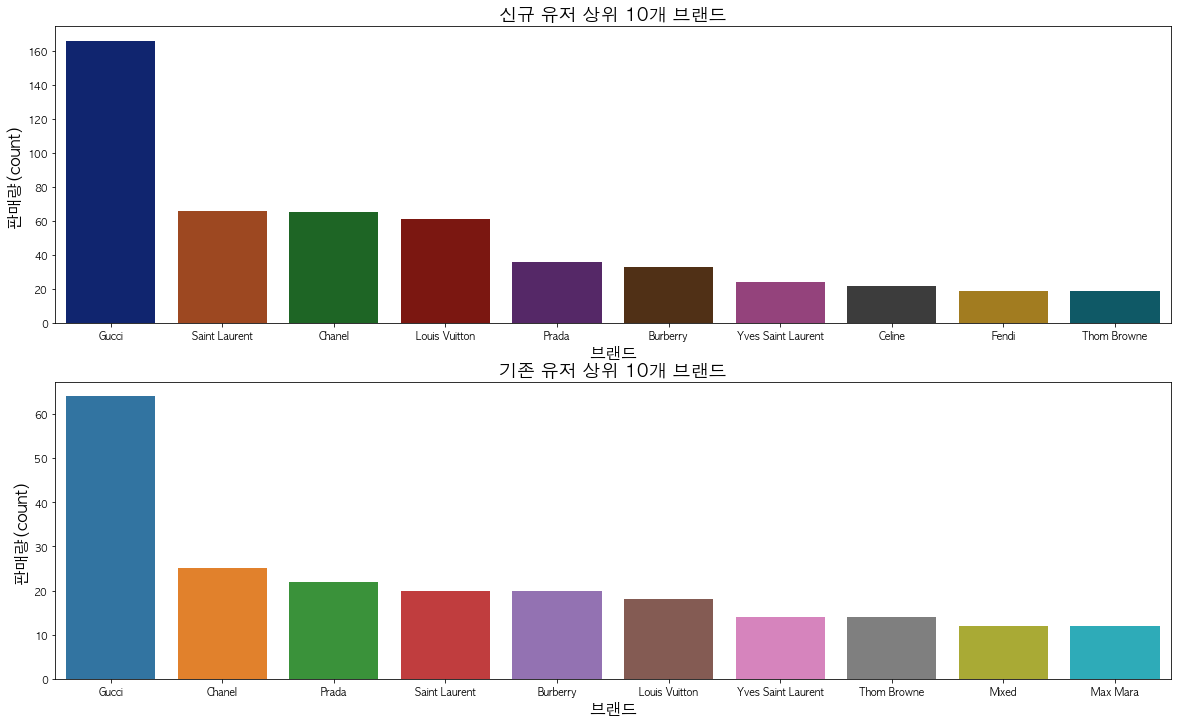

In [58]:
new_br = new_usr.brandnm.value_counts().sort_values(ascending=False).head(10)
old_br = old_usr.brandnm.value_counts().sort_values(ascending=False).head(10)

plt.subplots(2,1,figsize=(20,12))
plt.subplot(211)
sns.barplot(new_br.index, new_br.values, palette='dark')
plt.title('신규 유저 상위 10개 브랜드', fontsize=18)
plt.ylabel('판매량(count)', fontsize=16)
plt.xlabel('브랜드', fontsize=16)

plt.subplot(212)
sns.barplot(old_br.index, old_br.values)
plt.title('기존 유저 상위 10개 브랜드', fontsize=18)
plt.ylabel('판매량(count)', fontsize=16)
plt.xlabel('브랜드', fontsize=16)
plt.show()

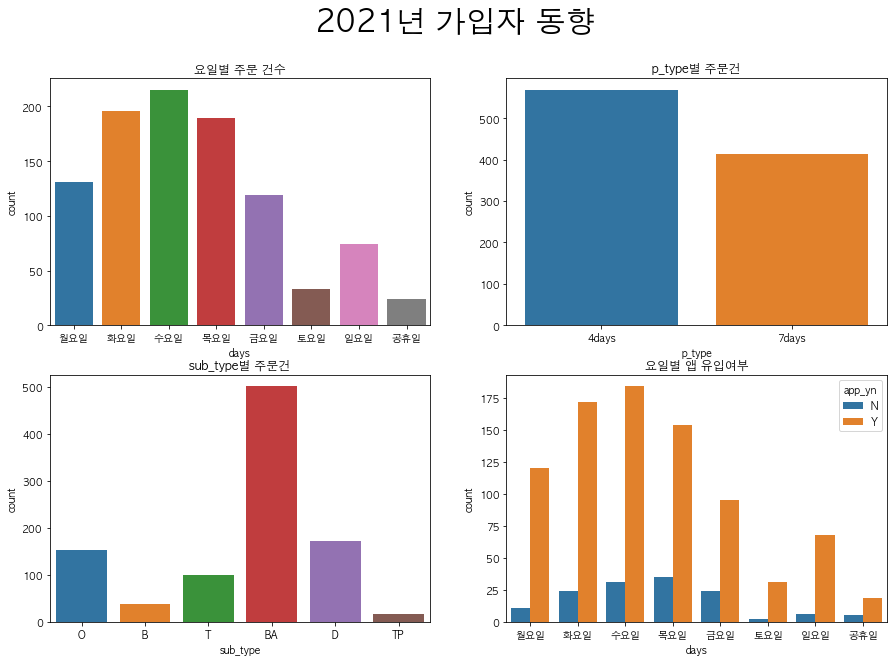

In [59]:
f, ax  = plt.subplots(2,2,figsize=(15,10))
plt.subplot(221)
sns.countplot(data=new_usr, x='days',
             order=['월요일','화요일','수요일','목요일','금요일','토요일','일요일', '공휴일'])
plt.title('요일별 주문 건수')

plt.subplot(222)
sns.countplot(data=new_usr, x='p_type')
plt.title('p_type별 주문건')

plt.subplot(223)
sns.countplot(data=new_usr, x='sub_type')
plt.title('sub_type별 주문건')

plt.subplot(224)
sns.countplot(data=new_usr, x='days', hue='app_yn',
             order=['월요일','화요일','수요일','목요일','금요일','토요일','일요일', '공휴일'])
plt.title('요일별 앱 유입여부')

plt.suptitle('2021년 가입자 동향',fontsize=30, fontweight = 'bold')
plt.show()

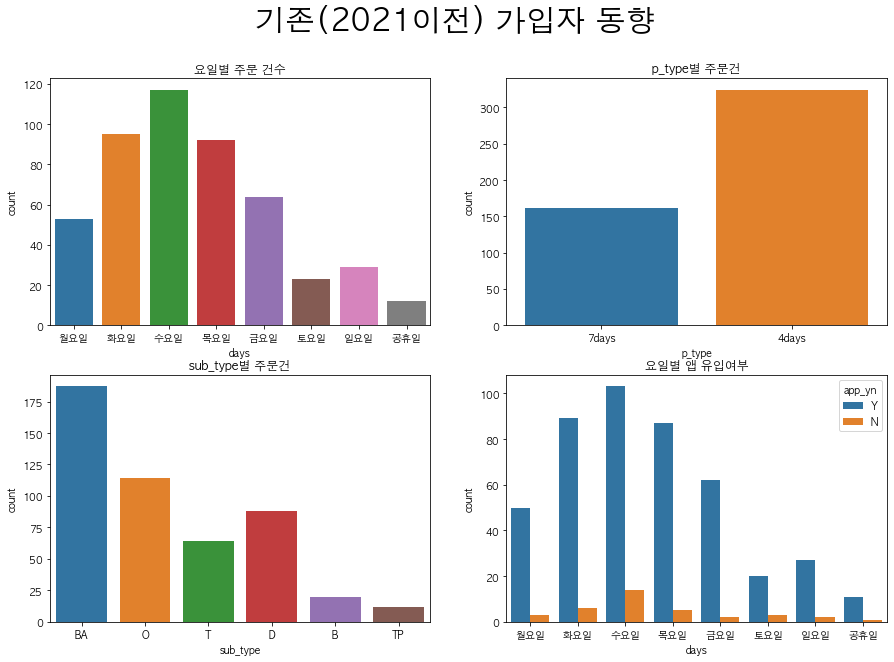

In [60]:
f, ax  = plt.subplots(2,2,figsize=(15,10))
plt.subplot(221)
sns.countplot(data=old_usr, x='days',
             order=['월요일','화요일','수요일','목요일','금요일','토요일','일요일', '공휴일'])
plt.title('요일별 주문 건수')

plt.subplot(222)
sns.countplot(data=old_usr, x='p_type')
plt.title('p_type별 주문건')

plt.subplot(223)
sns.countplot(data=old_usr, x='sub_type')
plt.title('sub_type별 주문건')

plt.subplot(224)
sns.countplot(data=old_usr, x='days', hue='app_yn', 
             order=['월요일','화요일','수요일','목요일','금요일','토요일','일요일', '공휴일'])
plt.title('요일별 앱 유입여부')

plt.suptitle('기존(2021이전) 가입자 동향',fontsize=30, fontweight = 'bold')
plt.show()

In [62]:
df[df.sub_type=='D']['brandnm'].value_counts()

Sandro                 17
It michaa              12
Gucci                  11
Jill Stuart            10
Michaa                  9
                       ..
Greedilous              1
McGinn                  1
Jill By Jill Stuart     1
Olive des Olive         1
Polo Ralph Lauren       1
Name: brandnm, Length: 98, dtype: int64